# Image Filtering

The main objectives of this module are:

* Implement point filtering with look-up tables.
* Implement region filtering with kernel convolution, morphological operations and edge detection.
* Understand spatial frequency information with the Fourier transform.

## 1. Look-up tables

Look-up tables are a very useful tool to perform simple pixel-level filtering of an image.

Numpy arrays indexing ([see reference here](http://docs.scipy.org/doc/numpy/user/basics.indexing.html)) is a very powerful tool, but can be a bit counter-intuitive at first. We will use it to quickly create and use look-up tables to transform an image.

Look at the short example below. 

We construct an image with 4 possible values for each pixel (-> $I(x,y) \in \{0,1,2,3\}$). We then build the following LUT:

|Input value|Output value|
|--|--|
|0|2|
|1|3|
|2|1|
|3|0|

And we apply it on the image.

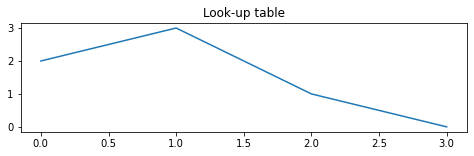

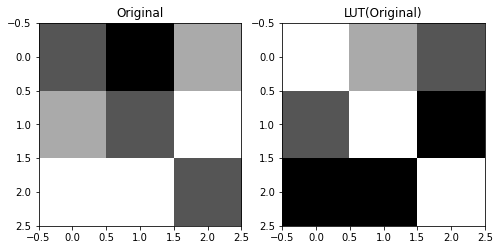

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# Let's create a 3x3 "image" with 4 possible pixel values (in [0,3])
im = np.array([[1,0,2],[2,1,3],[3,3,1]])

# look-up table is a vector of size 4 mapping the new value for the pixels of m
lut = np.array([2,3,1,0]) # maps 0 -> 2, 1 -> 3, 2 -> 1, 3 -> 0

plt.figure(figsize=(8,2))
plt.plot(lut)
plt.title('Look-up table')
plt.show()

# we can use numpy vector indexing to apply the look-up table:
new_im = lut[im] # This will create a new array with the same size as m

plt.figure(figsize=(8,4))
plt.subplot(1,2,1) #supblot is useful to display images side-by-side
plt.imshow(im, cmap=cm.gray)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(new_im, cmap=cm.gray)
plt.title('LUT(Original)')
plt.show()

**Starting from this example, create the following LUTs** and apply them to the "walking.jpg" image:
1. For inverting an image (so that $0 \rightarrow 255$, $255 \rightarrow 0$)
1. To keep only graylevel such that $g \ge t$, setting all other values to 0.
1. To reduce the number of gray levels from 256 to 8 (so that $255 \rightarrow 7$, $0 \rightarrow 0$).
1. To "stretch" the histogram so that, given a **minimum value** $T_{min}$ and a **maximum value** $T_{max}$, we have :
    * If $I(x,y) < T_{min}$, the new value is set to 0
    * If $I(x,y) > T_{max}$, the new value is set to 255
    * Values between $T_{min}$ and $T_{max}$ are stretched to cover the entire histogram.
1. to perform an **equalization** of the cameraman image (so that the histogram becomes "as flat as possible")

In [23]:
from skimage.io import imread,imshow,imsave

im = imread('walking.jpg')

In [24]:
# 1.
lut1 = -np.arange(-255,1)

# 2.
t = 45
lut2 = np.ones(256)
lut2[:t] = 0

# 3.
lut3 = (np.arange(0,256)//64)

# 4.
def stretch_histogram(image, low_perc, high_perc) :
    ## Auto leveling
    ch = cumul_hist(im)
    low_perc = 0.2
    low_bound = ch[ch<low_perc][-1]
    tmin = np.where(ch==low_bound)[0][0]

    high_perc = 0.8
    high_bound = ch[ch>high_perc][0]
    tmax = np.where(ch==high_bound)[0][0]
    ##
    
    taken_care_of = []
    lut = np.arange(0,256)
    lut[:tmin] = 0
    lut[tmax:] = 255
    lut[tmin:tmax] = (255/(tmax-tmin)) * (lut[tmin:tmax] - tmin)
    return lut.astype('int16')


 
def cumul_hist(im) :
    cumul_hist = np.zeros((256,))
    c = 0
    
    for v in range(256) :
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist



lut4 = stretch_histogram(im,0.2, 0.9 )

# 5. Look up table based on the cumulative histogram
ch = cumul_hist(im)
lut5 = (ch*255).astype("int16") #or uint8, but not int8 !! will make appear negative values

/home/sami/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


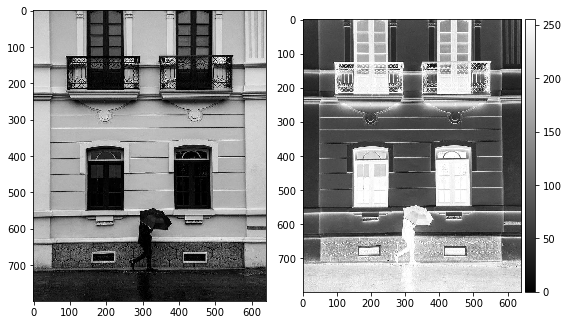

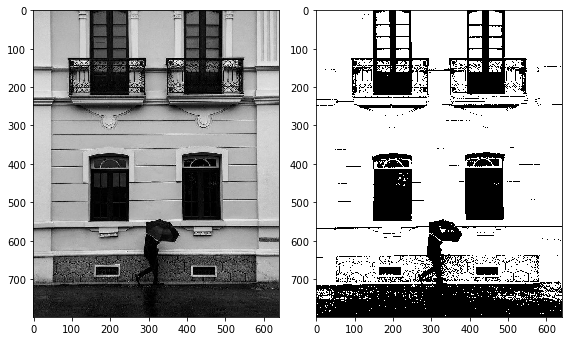

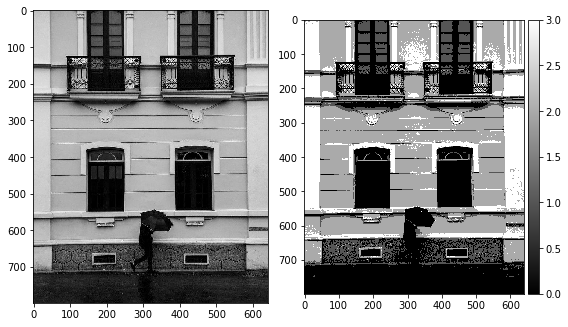

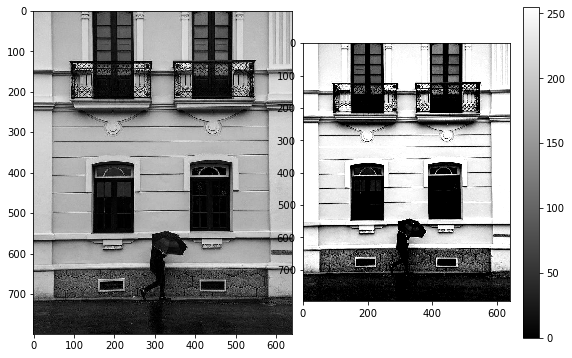

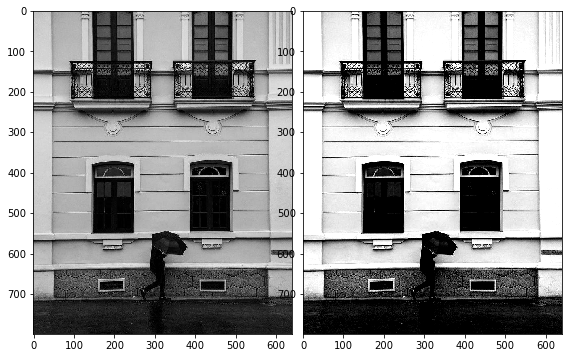

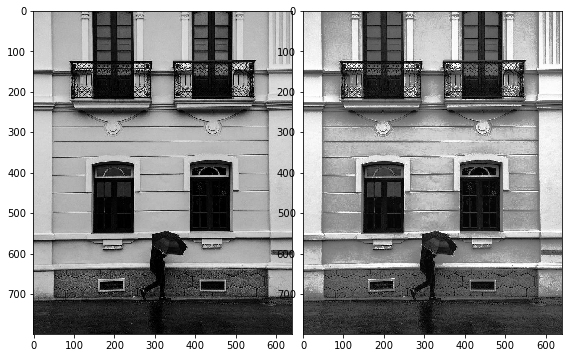

In [25]:

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
imshow(lut1[im], cmap=cm.gray)
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
imshow(lut2[im])
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
imshow(lut3[im], cmap=cm.gray)
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
plt.imshow(lut4[im],interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
plt.imshow(lut4[im],interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)
plt.show()

plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
imshow(im)
plt.subplot(1,2,2)
plt.imshow(lut5[im],interpolation='nearest',cmap=cm.gray,vmin=0, vmax=255)
plt.show()

## -- Your code here -- ##

**Need more help? You can check the following videos:**

* [Look-Up Tables](https://www.youtube.com/watch?v=PHiiKoSsVac&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=13)
* [Auto-levels](https://www.youtube.com/watch?v=DLN4jfBJakQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=14)
* [Equalization](https://www.youtube.com/watch?v=C44WuMUudik&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=15)

## 2. Kernel convolution

Kernal convolution allows us to filter an image based on the values of a neighborhood.

Write a program that applies a 3x3 kernel convolution on an image. Use it on the "walking" image to perform a mean filter.

In [26]:



kernel = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])


def conv(im, kernel):
    ksize = kernel.shape[0]
    
    im_output = np.zeros((im.shape[0], im.shape[1]))
    # For each pixel
    for y in range(ksize//2, im.shape[0]-ksize//2) :
        for x in range(ksize//2, im.shape[1]-ksize//2) :
            
            # We build a region based on the kernel size
            ## Attention not to begin with y = 0... we should begin with a 
            region = im[y-ksize//2:y+ksize//2+1 , x-ksize//2:x+ksize//2+1]
            
            # We apply every element of the kernel to the pixel
            for i in range(ksize) :
                for j in range(ksize) :
                    im_output += kernel[i,j]*region[i,j]
                    
                    
    return im_output

im = imread('walking.jpg')

mean_k = np.ones((3,3))/9.

#output = conv(im, mean_k)


#plt.imshow(output, cmap=cm.gray)


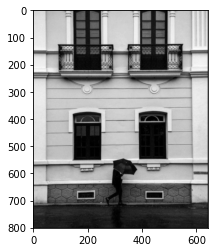

In [27]:
## Using convolve2d
from scipy.signal import convolve2d

output=convolve2d(im, mean_k)

plt.imshow(output, cmap=cm.gray)

Using the [median filter](https://scikit-image.org/docs/stable/api/skimage.filters.rank.html#skimage.filters.rank.median) and the [mean filter](https://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) from scikit-image, compare the behaviour of the two filters with neighborhood of increasing sizes on the "noisy" astronaut image:

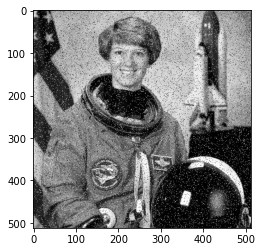

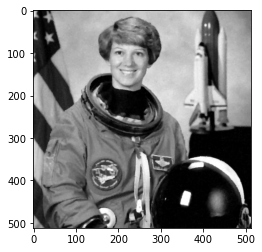

In [28]:
from skimage.filters.rank import mean, median
from skimage.morphology import disk

im = imread('astronaut_noisy.jpg')
im_mean = mean(im, disk(2))
im_median = median(im, disk(2))

plt.figure()
plt.imshow(im, cmap=cm.gray)
plt.show()

plt.figure()
plt.imshow(im_median, cmap=cm.gray)
plt.show()

## -- Your code here -- ##


**Need more help? You can check the following videos:**

* [Kernel convolution](https://www.youtube.com/watch?v=FaTvGWPnLng&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=16)
* [Mean and Median filters](https://www.youtube.com/watch?v=GLTuF3lwDLs&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=17)

## 3. 2D Fourier transform

The 2D Fourier transform allows us to get a representation of the spatial frequencies present in an image. A very powerful way of filtering images is to modify those frequencies directly by modifying the "Fourier image", and to use the inverse transform to get the pixel values of the filtered image.

Let's illustrate that with a fake example. We start with a completely random signal and compute the Fourier transform. Note that the Fourier image is complex, so we use its amplitude. As the range of amplitudes is so high that we don't see much in the resulting image, we display the log of the amplitude.

### Understanding 2F Fourier transform : see video and notebook

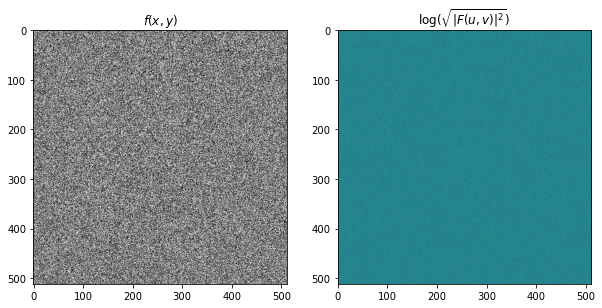

In [29]:
from numpy.fft import fft2,ifft2,fftshift,ifftshift
# fft2 -> Fourier transform
# ifft2 -> Inverse transform
# fftshift & ifftshift -> reorganize the "Fourier image" to make it more easily interpretable.

## fftshift : Shift the zero-frequency component to the center of the spectrum.

im = np.random.random((512,512))
f = fftshift(fft2(im))
amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$\log(\sqrt{|F(u,v)|^2})$')
plt.show()

We could now, for instance, decide to add an horizontal frequency by creating peaks in the Fourier image on the horizontal axis. The further away from the center we put the peaks, the higher the frequency.

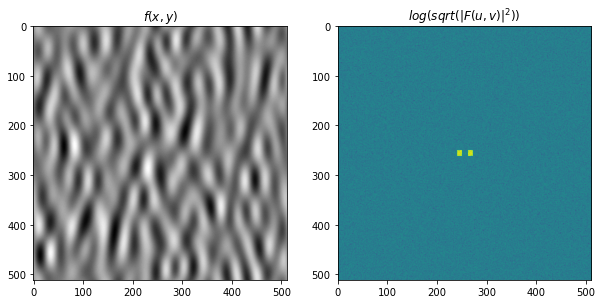

In [30]:
f2 = f.copy()
f2[250:262,262:272] *= 1000
f2[250:262,240:250] *= 1000
# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(np.log(np.sqrt(np.real(f2)**2+np.imag(f2)**2)), cmap=cm.gray)
# plt.subplot(1,2,2)
# plt.imshow(np.log(np.sqrt(np.real(f)**2+np.imag(f)**2)), cmap=cm.gray)
# plt.show()

amplitude = np.sqrt(np.real(f2)**2+np.imag(f2)**2)
im2 = ifft2(ifftshift(f2)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im2,cmap = plt.cm.gray) ## Different from im !
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude))# show log so as to see more than just the global maximum
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

# 

Now we could also decide to mask the central region, which would remove the peaks that we just created and put all those values at zero. The image will once again look random:

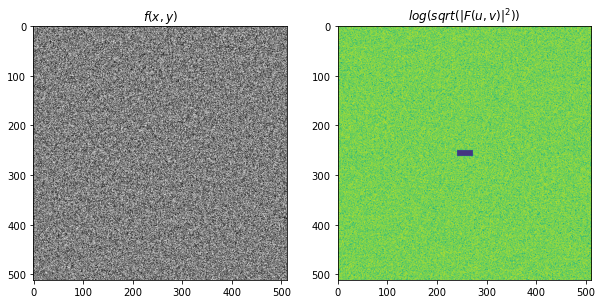

In [31]:
f3 = f2.copy()
f3[250:262,240:272] = 0
amplitude = np.sqrt(np.real(f3)**2+np.imag(f3)**2)
im3 = ifft2(ifftshift(f3)).real

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.imshow(im3,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,2,2)
plt.imshow(np.log(amplitude, where=amplitude>0))
plt.title('$log(sqrt(|F(u,v)|^2))$')
plt.show()

### Fourier transform functions 

In [48]:
def fourier2(im):
    return fftshift(fft2(im))

def ifourier2(f):
    return ifft2(ifftshift(f)).real

def fourier(s):
    return fftshift(fft(s))

def ifourier(f):
    return ifft(ifftshift(f)).real

def ampl(f):
    return np.sqrt(f.real**2 + f.imag**2)

def phase(f):
    return np.arctan2(f.imag, f.real)

### Fourier mask
To build a low pass filter, we want to remove higher frequencies. So we clean the image in Fourier space, then we reconstruct.

Thus, first we build a mask. 

Keep a square that will be the center of the image in the fourier transform.



<ipython-input-80-3103287eb612>:19: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ampl(f2))+1, interpolation='none', cmap='viridis')


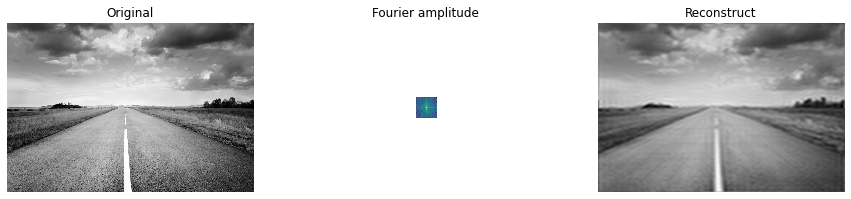

In [80]:
from skimage.filters import gaussian

dsize =40

mask = np.zeros(im.shape)
mask[mask.shape[0]//2-dsize : mask.shape[0]//2 + dsize , mask.shape[1]//2-dsize : mask.shape[1]//2+dsize] = 1
#mask[mask.shape[0]//2-dsize : mask.shape[0]//2 + dsize+1 , mask.shape[1]//2-dsize : mask.shape[1]//2+dsize+1] = disk(dsize)
#mask =gaussian(mask, 2)
f = fourier2(im)
f2 = f*mask

reconstruct = ifourier2(f2)
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(im, cmap=plt.cm.gray,  interpolation='none')
plt.title('Original')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f2))+1, interpolation='none', cmap='viridis')
plt.title('Fourier amplitude')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(reconstruct, interpolation='none', cmap=cm.gray)
plt.title('Reconstruct')
plt.axis('off')
plt.show()


### Interpretation
- Disk size : higher disk size mean we keep a lot of the signal.
- If we take a disk size that is really small, we would have something completely blurry


Output image : we see a lot of patterns that occur. This is because the mask is very sharp.

If we chose a mask that is circular, for example a disk, we wouldn't have this problem. See : replacing "= 1" by "= disk(dsize)". We would still have those patterns resulting from a sharp mask, but the interpretation of the mask that we have is closer to what we want : remove some frequencies.

Smooth the mask : add a gaussian filter.
`mask = gaussian(mask, 2)`

### Creating high-pass filter 
` = 1 - disk(dsize)` this will have as effet to build a mask for a high-pass filter

Remove the central part of the image, keep high-frequencies. With this, it is better to plot the absolute of the reconstructed image.

Starting from those examples and the code below:

1. Use the Fourier transform to reduce the [dithering](https://en.wikipedia.org/wiki/Dither) of the *moire.png* image by building a low-pass filter.
1. Build a high-pass filter using Fourier transform and apply the filter to the "walking" image.

<ipython-input-95-362eb4845068>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = imread('moire1.png').astype(np.float)
<ipython-input-95-362eb4845068>:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ampl(f2)))# show log so as to see more than just the global maximum


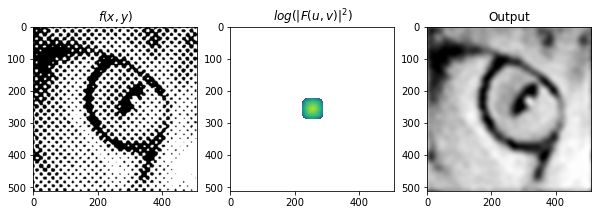

In [95]:
im = imread('moire1.png').astype(np.float)
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

## LOW PASS
# Build mask :
dsize = 15
mask = np.zeros(im.shape)
mask[mask.shape[0]//2-dsize : mask.shape[0]//2 + dsize+1 , mask.shape[1]//2-dsize : mask.shape[1]//2+dsize+1] =disk(dsize)
mask = gaussian(mask, 5)
f2 = f*mask

reconstruct = ifourier2(f2)

plt.figure(figsize=[10,5])
plt.subplot(1,3,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f2)))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.subplot(1,3,3)
plt.imshow(reconstruct, cmap=cm.gray,vmin=0, vmax=255)
plt.title('Output')
plt.show()

<ipython-input-107-2724b002575f>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im = imread('walking.jpg').astype(np.float)
<ipython-input-107-2724b002575f>:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(ampl(f2)))# show log so as to see more than just the global maximum


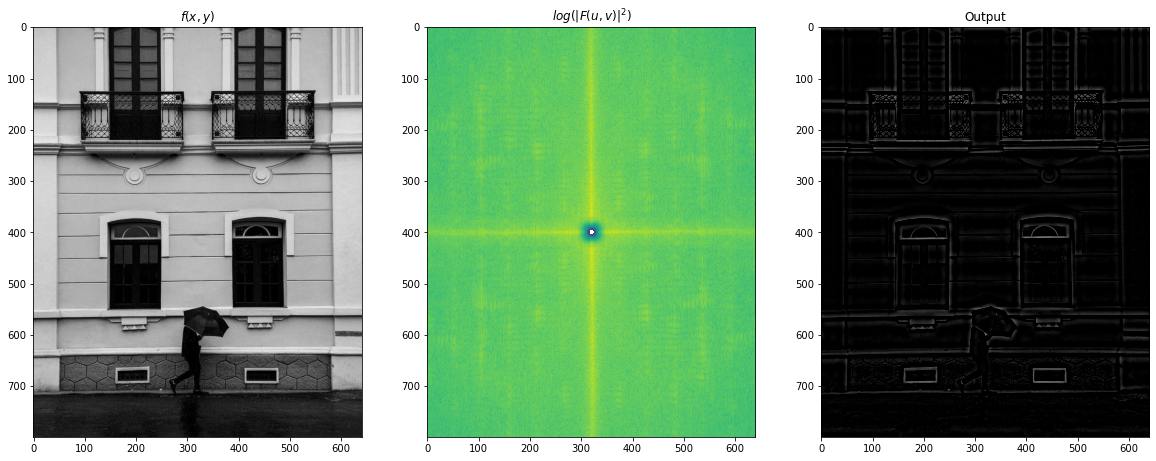

In [107]:
im = imread('walking.jpg').astype(np.float)
f = fftshift(fft2(im)) # shift Fourier image so that the center corresponds to low frequencies

amplitude = np.sqrt(np.real(f)**2+np.imag(f)**2)

## HIGH PASS
# Build mask :
dsize = 30
mask = np.ones(im.shape)
mask[mask.shape[0]//2-dsize : mask.shape[0]//2 + dsize+1 , mask.shape[1]//2-dsize : mask.shape[1]//2+dsize+1] = 1 - disk(dsize)
mask = gaussian(mask, 5)
f2 = f*mask

reconstruct = ifourier2(f2)
plt.figure(figsize=[20,15])
plt.subplot(1,3,1)
plt.imshow(im,cmap = plt.cm.gray)
plt.title('$f(x,y)$')
plt.subplot(1,3,2)
plt.imshow(np.log(ampl(f2)))# show log so as to see more than just the global maximum
plt.title('$log(|F(u,v)|^2)$')
plt.subplot(1,3,3)
plt.imshow(reconstruct, cmap=cm.gray,vmin=0, vmax=255)
plt.title('Output')
plt.show()

**Need more help? You can check the following videos:**

* [Understanding the 2D Fourier transform](https://www.youtube.com/watch?v=bsNQpeBZ7IY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=18)
* [Filters in Fourier space](https://www.youtube.com/watch?v=8g-sE7wkKpU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=19)

## 4. Morphological operations

* For morphology functions, [see the skimage documentation](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

First, we need a binary image.

In [108]:
im = imread('walking.jpg')
im = im > 120

Starting from the example below:

1. Using the "opening" operation with a disk structuring element of increasing size, determine how many circles of any given radius there are in the *circles.png* image.
1. Build a morphological filter that eliminates one size of circles. 

Text(0.5, 1.0, 'closing')

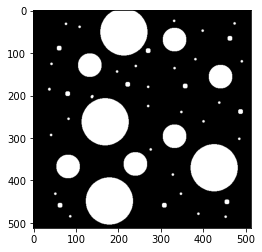

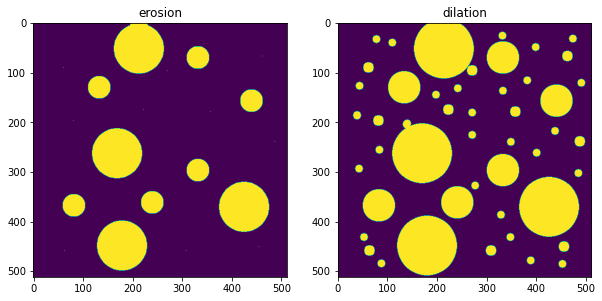

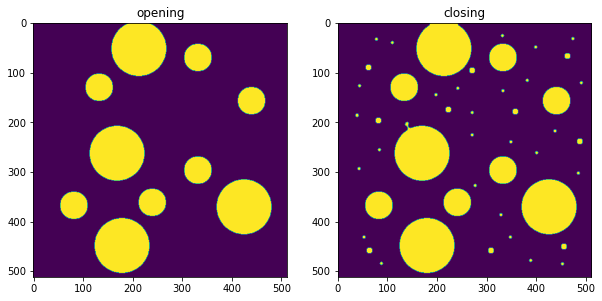

In [118]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
from skimage.morphology import disk, erosion, dilation, opening, closing

im = imread('circles1.png')==0 #to be sure objects are = 1
plt.imshow(im,cmap=plt.cm.gray);

# use the local maximum and local minimum for dilation and erosion
eroded_image = erosion(im,disk(5)) 
dilated_image = dilation(im,disk(10))
opened_image = opening(im, disk(15))
closed_image = closing(im, disk(5))

#plt.figure(figsize=[10,8])
#plt.subplot(1,2,1)
#plt.imshow(eroded_image)
#plt.title('erosion')
#plt.subplot(1,2,2)
#plt.imshow(dilated_image)
#plt.title('dilation')

# note that "erosion" and "dilation" are the same as the "local minimum" and "local maximum" :
from skimage.filters.rank import minimum,maximum
eroded_image = minimum(im.astype('uint8'), disk(5))
dilated_image = maximum(im.astype('uint8'), disk(5))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation')

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(opened_image)
plt.title('opening')
plt.subplot(1,2,2)
plt.imshow(closed_image)
plt.title('closing')

### Exercise 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
from skimage.morphology import disk, erosion, dilation, opening, closing
from skimage.measure import label
import pandas as pd


im = imread('circles1.png')==0 #to be sure objects are = 1
plt.imshow(im,cmap=plt.cm.gray)

radius_to_clean = 20

def count_circles(im) :
    return np.unique(label(im)).size

radius_count_df = pd.DataFrame(columns=["Radius", "Count"])

opened_dict = dict()

radiuses = reversed(range(1,100))
for i in radiuses :
    print(i)
    opened = opening(im, disk(i))
    opened_dict[i] = opened
    
for i in range(1,120) :
    opened1 = opened_dict[i]
    opened2 = opened_dict[i+1]
    
    count1 = count_circles(opened1)
    count2 = count_circles(opened2)
    
    df2 = {"Radius" : i, "Count" : count1-count2}
    
    radius_count_df = radius_count_df.append(df2, ignore_index=True)

radius_count_df.to_csv("Radius_count.csv")

### Exercise 2

**Need more help? You can check the following videos:**

* [Morphological operations](https://www.youtube.com/watch?v=b64M2dZaWPA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=20)

## 5. Edge detection

Using the [convolve2d](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.convolve2d.html) function, develop the Sobel filter. 
The Sobel operator is given by
$$\mathbf{G} = \sqrt{ {\mathbf{G}_x}^2 + {\mathbf{G}_y}^2 }$$
where $G_x$ and $G_y$ are images respectively obtained by a convolution with the given kernels
$$\mathbf{g}_y = \begin{bmatrix} 
    -1 & -2 & -1  \\
    0 & 0 & 0 \\
    +1 & +2 & +1 
    \end{bmatrix}
    \quad
    \mbox{and}
    \quad   
    \mathbf{g}_x = \begin{bmatrix} 
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 
    \end{bmatrix}
    $$

**Apply the Sobel filter** to find the edges in the "road" image.

Compare with the results of the **Canny edge filter** with different "sigma" values (see [the skimage documentation](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html))

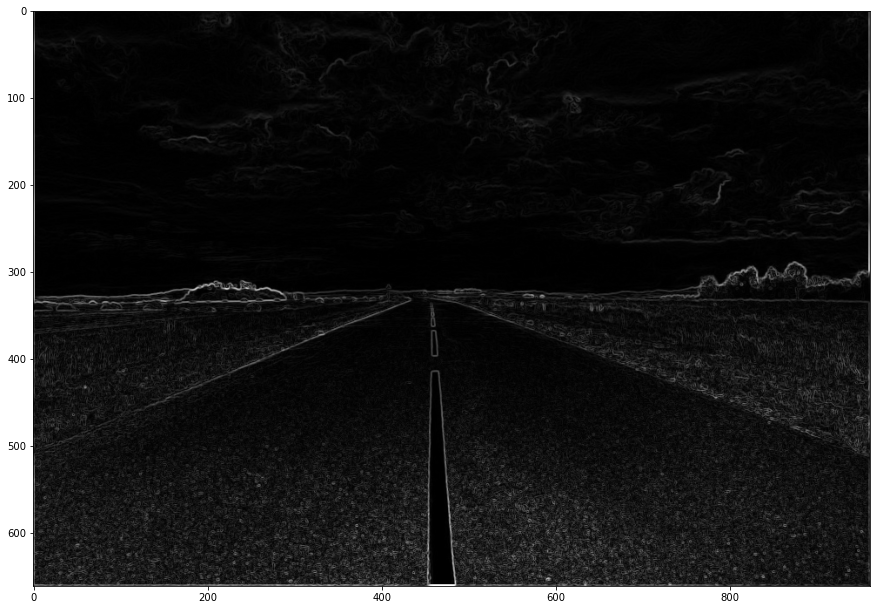

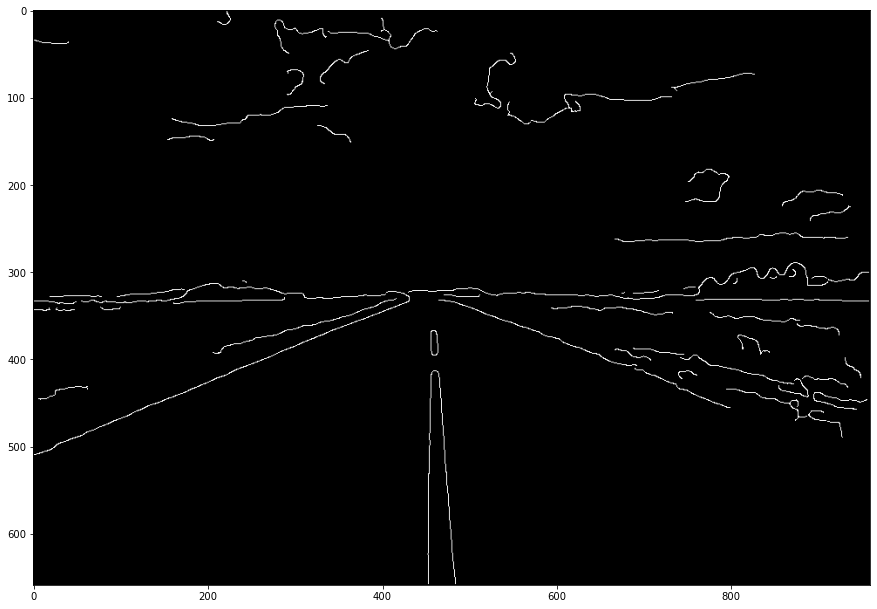

In [142]:
from skimage.data import camera
from skimage.io import imread

im = imread('road.jpg', as_gray=True)

gx = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

gy = np.transpose(gx)

sobelX = convolve2d(im, gx)
sobelY = convolve2d(im, gy)

filtered_image = np.sqrt(sobelX**2 + sobelY**2)



plt.figure(figsize=(15,15))
plt.imshow(filtered_image, cmap=plt.cm.gray)
plt.show()

## -- Your code here -- ##

from skimage.feature import canny

cannied_immage = canny(im, sigma=3)

plt.figure(figsize=(15,15))
plt.imshow(cannied_immage, cmap=plt.cm.gray)
plt.show()


Use the **[Hough transform](http://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)** to find the main straight lines in the road image, using the results from the Canny edge detector.

In [38]:

## -- Your code here -- ##


**Need more help? You can check the following videos:**

* [Edge detection with the Sobel filter](https://www.youtube.com/watch?v=QCjh8yyW-Wo&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=21)
* [Edge detection with the Canny transform](https://www.youtube.com/watch?v=yS5NnpWmuuI&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=22)
* [Line detection with the Hough Transform](https://www.youtube.com/watch?v=GD2xipfKQyY&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=23)

# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="etretat.jpg" width="250px" />
<img src="ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

In [39]:

# -- Your code here -- #


# Notes 

## Particular LUT
- range(0,256) : identity
- Inversion : making `255-im` is not optimized, because we make a computation for each element. An access in memory, i.e `lut[im]` is much more efficient
- Dividing the color ranges : from 256 levels to 8, or 4 levels
    - This is a way of compressing an image with few means
## Stretched histogram

- When we have some pixel values that are not so populated, we can forget them to "expand the colormap"
- We lose some information, yes, but those are few
- The type of LUT should not be float, because otherwise this would change the dtype of the image

## Equalized
- It is not flat
-